In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Insurance_data.csv")


In [3]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,28.278296,0,1,3,17522.994117
1,13,1,34.645514,2,0,2,1060.266919
2,26,1,33.451864,3,0,2,4610.297218
3,31,1,22.696083,0,0,1,22392.788911
4,34,1,28.983798,0,0,1,4171.444582
...,...,...,...,...,...,...,...
499995,57,0,23.483781,2,0,3,12431.243236
499996,27,1,36.579965,1,1,2,37773.936776
499997,44,0,29.820549,0,1,1,38234.157020
499998,27,1,28.770789,0,0,0,1707.182873


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       500000 non-null  int64  
 1   sex       500000 non-null  int32  
 2   bmi       500000 non-null  float64
 3   children  500000 non-null  int64  
 4   smoker    500000 non-null  int32  
 5   region    500000 non-null  int32  
 6   charges   500000 non-null  float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 21.0 MB


In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,39.117114,0.507218,30.702245,1.244536,0.203456,1.532438,13262.274849
std,14.431810,0.499948,6.208000,1.289041,0.402569,1.103280,12186.922102
min,13.000000,0.000000,12.527171,0.000000,0.000000,0.000000,-2382.192282
25%,26.000000,0.000000,26.234481,0.000000,0.000000,1.000000,4734.377463
50%,39.000000,1.000000,30.455130,1.000000,0.000000,2.000000,9365.649099
75%,51.000000,1.000000,34.841283,2.000000,0.000000,2.000000,16572.321269
max,69.000000,1.000000,56.578380,6.000000,1.000000,3.000000,67760.098433


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

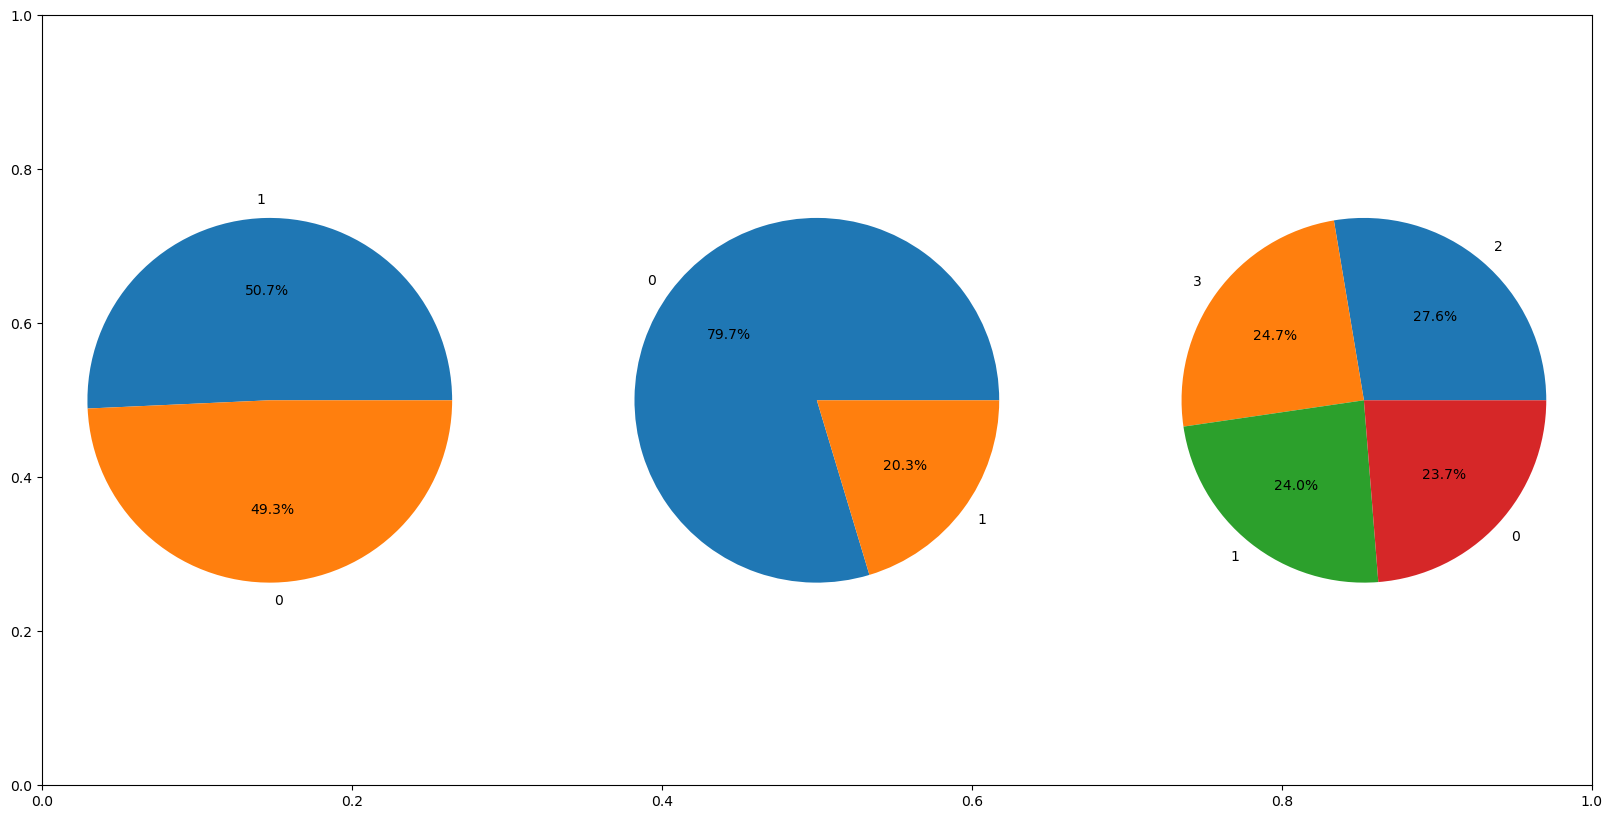

In [8]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()


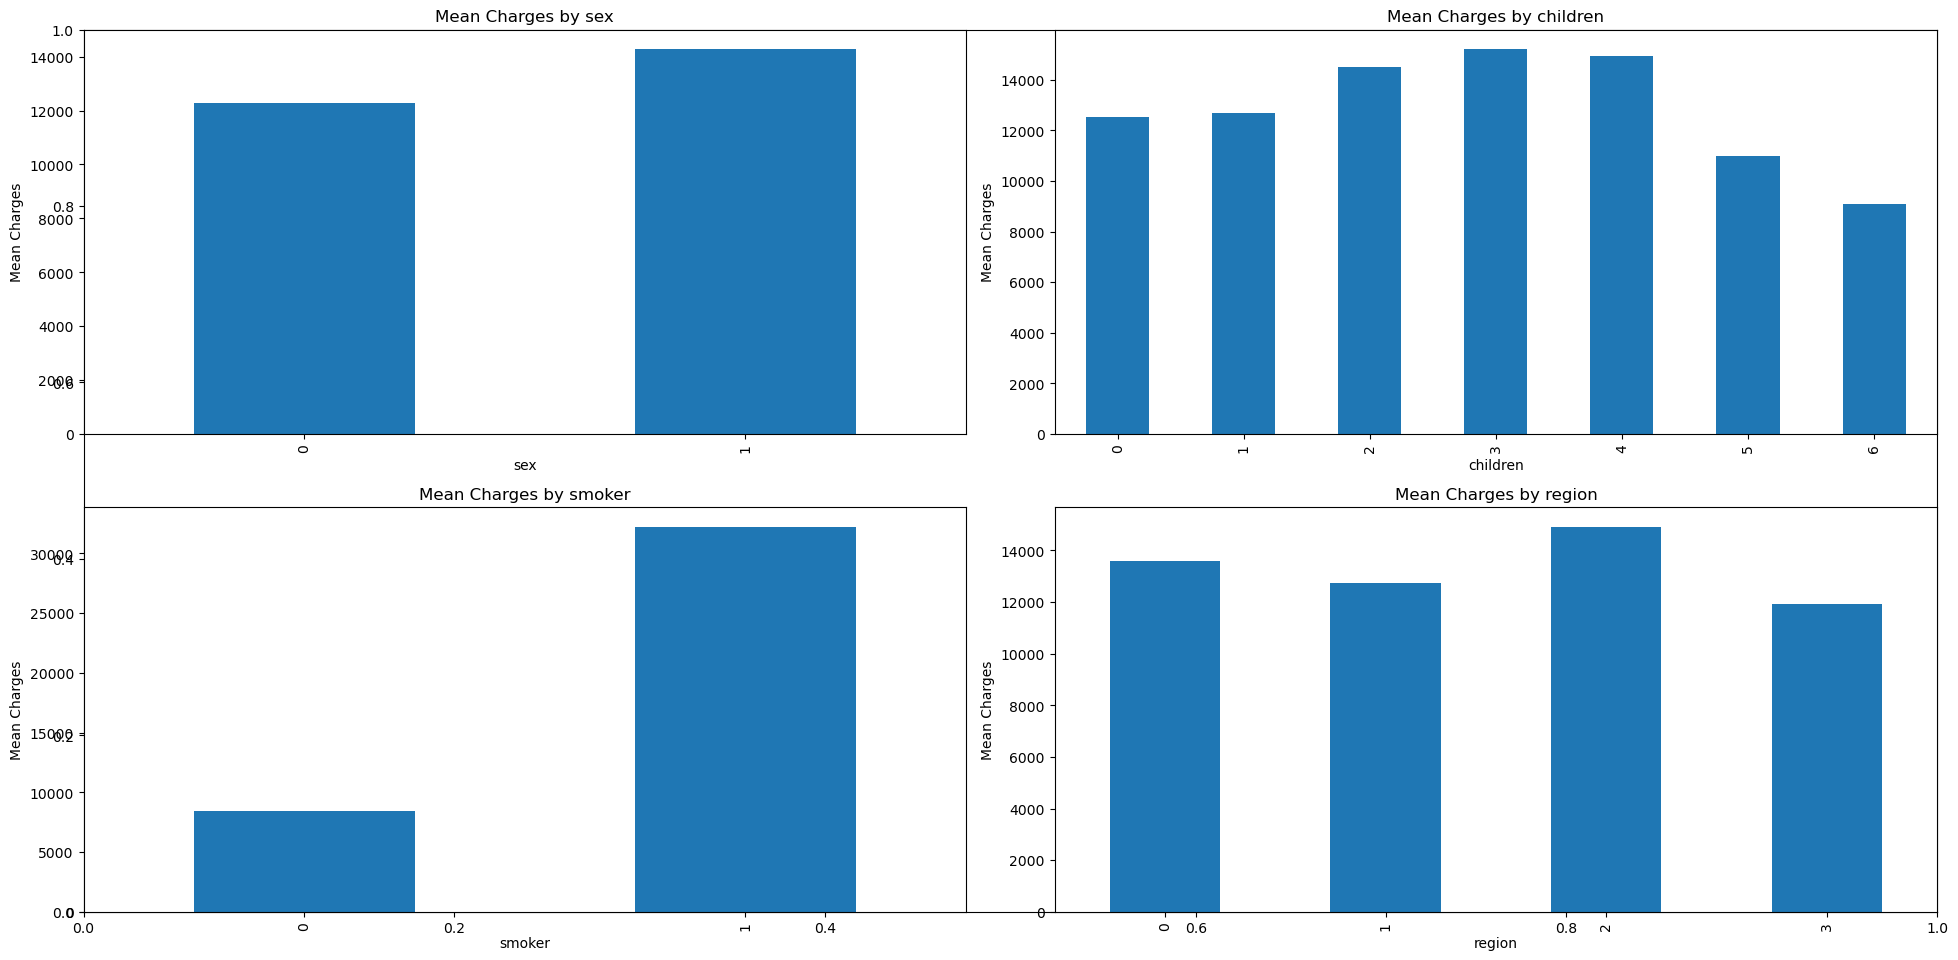

In [9]:
df_sampled = df.sample(n=10000, random_state=1)  

features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df_sampled.groupby(col).mean()['charges'].plot.bar()
    plt.title(f'Mean Charges by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Charges')

plt.tight_layout() 
plt.show()

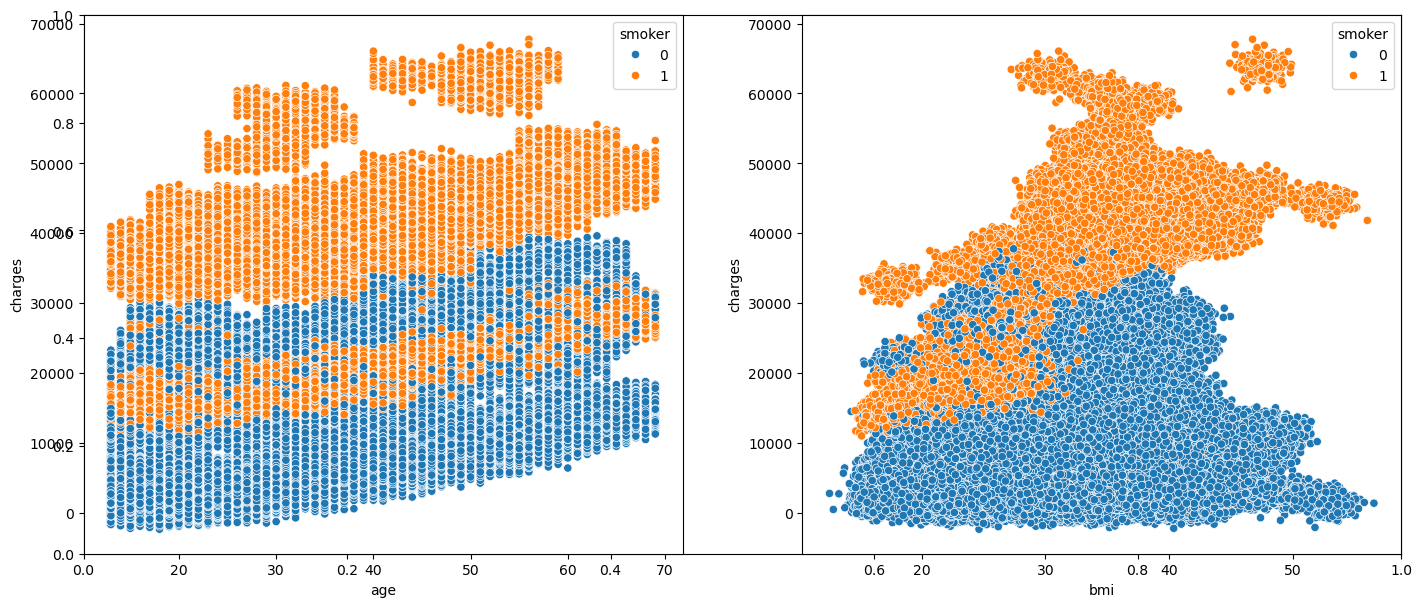

In [10]:
features = ['age', 'bmi']
 
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

<Axes: ylabel='age'>

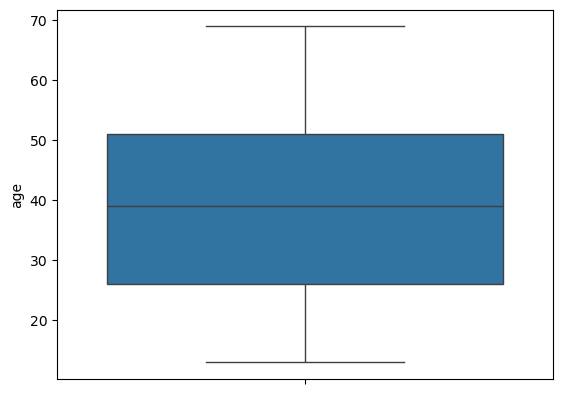

In [11]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

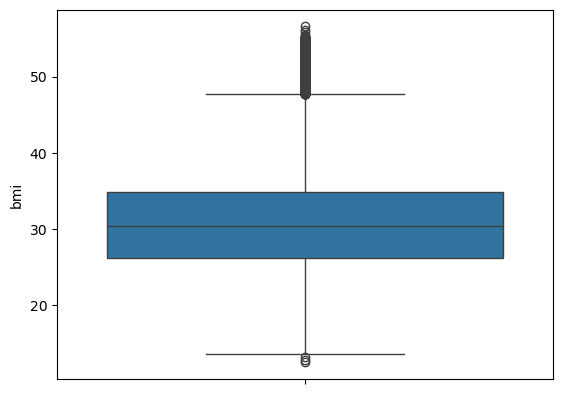

In [12]:
sns.boxplot(df['bmi'])

In [13]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.324277296803642
47.75148680008574


<Axes: ylabel='bmi'>

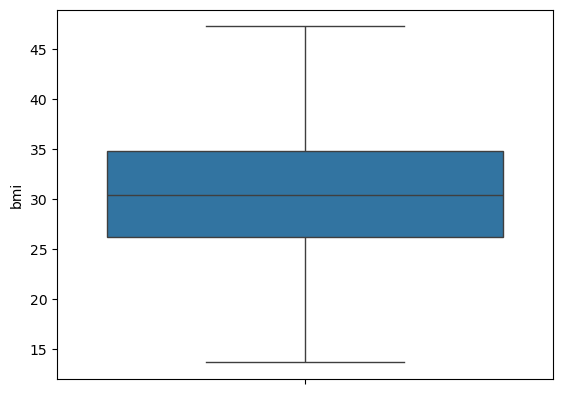

In [14]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [15]:
df['bmi'].skew()
df['age'].skew()

0.05664823555457541

In [16]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.024981,0.111226,0.029222,-0.022497,0.001220,0.290713
sex,-0.024981,1.000000,0.040972,0.012716,0.082327,0.004768,0.062526
bmi,0.111226,0.040972,1.000000,-0.003381,0.010427,0.157047,0.197080
children,0.029222,0.012716,-0.003381,1.000000,0.004582,0.013550,0.054092
smoker,-0.022497,0.082327,0.010427,0.004582,1.000000,-0.006763,0.786047
region,0.001220,0.004768,0.157047,0.013550,-0.006763,1.000000,-0.013486
charges,0.290713,0.062526,0.197080,0.054092,0.786047,-0.013486,1.000000


***Using XGBOOST***

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
import time

# Measure time for performance evaluation
start_time = time.time()

# Split the data into training and testing sets
X = df.drop(['charges'], axis=1)
Y = df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the XGBRegressor without GPU support
xgmodel = XGBRegressor()
xgmodel.fit(X_train, Y_train)

# Make predictions
Y_pred_train = xgmodel.predict(X_train)
Y_pred_test = xgmodel.predict(X_test)

# Print R2 scores for training and test data
print("Initial XGBoost Model Performance:")
print(f"Training R2 Score: {r2_score(Y_train, Y_pred_train):.4f}")
print(f"Test R2 Score: {r2_score(Y_test, Y_pred_test):.4f}")

# Print cross-validation score
cv_score = cross_val_score(xgmodel, X, Y, cv=5, n_jobs=-1).mean()
print(f"Initial Cross-Validation Score: {cv_score:.4f}")

# Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.15, 0.3]
}
grid = GridSearchCV(xgmodel, param_grid, scoring="r2", cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

# Print the best parameters from Grid Search
print("\nGrid Search Results:")
print(f"Best Parameters: {grid.best_params_}")

# Reinitialize and train the model with the best parameters
xgmodel = XGBRegressor(
    n_estimators=grid.best_params_['n_estimators'],
    max_depth=grid.best_params_['max_depth'],
    gamma=grid.best_params_['gamma']
)
xgmodel.fit(X_train, Y_train)

# Make predictions with the tuned model
Y_pred_train = xgmodel.predict(X_train)
Y_pred_test = xgmodel.predict(X_test)

# Print R2 scores for training and test data with the tuned model
print("\nTuned XGBoost Model Performance:")
print(f"Training R2 Score: {r2_score(Y_train, Y_pred_train):.4f}")
print(f"Test R2 Score: {r2_score(Y_test, Y_pred_test):.4f}")

# Print cross-validation score for the tuned model
tuned_cv_score = cross_val_score(xgmodel, X, Y, cv=5, n_jobs=-1).mean()
print(f"Tuned Cross-Validation Score: {tuned_cv_score:.4f}")

# Measure and print the total time taken
end_time = time.time()
print(f"Total time taken: {end_time - start_time:.2f} seconds")


Initial XGBoost Model Performance:
Training R2 Score: 0.8885
Test R2 Score: 0.8871
Initial Cross-Validation Score: 0.8875

Grid Search Results:
Best Parameters: {'gamma': 0, 'max_depth': 5, 'n_estimators': 100}

Tuned XGBoost Model Performance:
Training R2 Score: 0.8779
Test R2 Score: 0.8774
Tuned Cross-Validation Score: 0.8770
Total time taken: 46.70 seconds


In [19]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats


,Importance
age,0.030833
sex,0.003229
bmi,0.042186
children,0.004508
smoker,0.915178
region,0.004065


In [20]:
important_features=feats[feats['Importance']>0.01]
important_features


,Importance
age,0.030833
bmi,0.042186
smoker,0.915178


***Final model with tuned Hyperparameters***

In [28]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Drop unwanted columns and define features and target

X = df.drop(columns=['charges'])
Y = df['charges']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the XGBRegressor with chosen hyperparameters
final_model = XGBRegressor(
    n_estimators=grid.best_params_['n_estimators'],
    max_depth=grid.best_params_['max_depth'],
    gamma=grid.best_params_['gamma']
)
final_model.fit(X_train, Y_train)

# Make predictions
Y_pred_train = final_model.predict(X_train)
Y_pred_test = final_model.predict(X_test)

# Evaluate the model performance
print("Model Performance:")
print(f"Training R2 Score: {r2_score(Y_train, Y_pred_train):.4f}")
print(f"Test R2 Score: {r2_score(Y_test, Y_pred_test):.4f}")

# Print cross-validation score
cv_score = cross_val_score(final_model, X, Y, cv=5).mean()
print(f"Cross-Validation Score: {cv_score:.4f}")


Model Performance:
Training R2 Score: 0.8560
Test R2 Score: 0.8548
Cross-Validation Score: 0.8546


In [29]:
from pickle import dump
dump(final_model, open('insurancemodel.pkl', 'wb'))